# Assignment 6
## Logisitc Regression

Please add the name, first name, immatriculation number and study program below. Each member of the group has to be added:
- *Name: , First Name: , matr. number: , study program:.*
- *Name:, First Name:, matr. number:, study program:.*
- *Name:, First Name:, matr. number:, study program:.*

# Task 3: Logistic Regression

In this task, you'll implement a **multiclass classification model** based on **logistic regression**. Your task is to design and train the model from scratch, **using only foundational tools like NumPy for numerical computation and Matplotlib for visualization**.


## Dataset

You are provided with a dataset containing two numerical features and a class label for each observation. The dataset is stored in a CSV file named `multi_class_dataset.csv`.

Each row represents a single observation with:
- `Feature 1`: a continuous numeric value
- `Feature 2`: a continuous numeric value
- `Label`: a categorical class (three distinct classes)

Use the following code to load and visualize it:

|    |   Feature 1 |   Feature 2 |   Class |
|---:|------------:|------------:|--------:|
|  0 |   -2.15212  |    -1.0101  |       1 |
|  1 |   -1.27873  |     3.402   |       0 |
|  2 |    1.52714  |    -3.41313 |       2 |
|  3 |    0.989644 |     1.49786 |       1 |
|  4 |    0.520196 |     1.53406 |       1 |


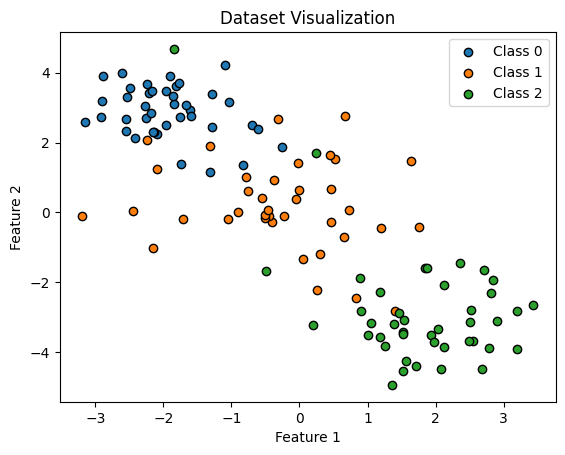

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  # Import for splitting

def load_dataset_from_csv(filename):
    df = pd.read_csv(filename)
    print(df.head().to_markdown())

    # Extract features and labels from the dataframe
    X = df[['Feature 1', 'Feature 2']].values
    y = df['Class'].values.astype(int)

    # Split the dataset into training and test sets
    # 80% training, 20% testing, with random shuffling
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    return X_train, X_test, y_train, y_test

def plot_data(X, y):
    plt.figure()
    for class_label in np.unique(y):
        plt.scatter(
            X[y == class_label, 0],
            X[y == class_label, 1],
            label=f'Class {class_label}',
            edgecolors='k'
        )
    plt.title("Dataset Visualization")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

# Load and split the dataset
X_train, X_test, y_train, y_test = load_dataset_from_csv("./data/multi_class_dataset.csv")

# Plot training data for visualization
plot_data(X_train, y_train)


Implement the softmax function to compute class probabilities.

In [ ]:
def softmax(z):
# your solution goes here

  return class_prob

Implement the function to calculate the model loss using cross-entropy.


In [ ]:
def cross_entropy_loss(y_true, y_pred):
# your solution goes here

  return loss

## Building and Training a Multiclass Logistic Regression Model

In this task, you'll implement the core functionality of your `LogisticRegressionSoftmax` class. This includes initializing model parameters, making predictions, and training the model using gradient descent.

---

####  `__init__` Method (Constructor)

Your model needs to store a set of parameters—weights and biases—that will be learned during training. These parameters depend on the input dimension and the number of output classes.

---

#### `fit` Method

This is where the model learns. The `fit` method should update the model's parameters using **gradient descent** to minimize the prediction error over time.

**Gradient descent** is an optimization algorithm that adjusts model parameters (weights and biases) in the direction that reduces the prediction error. For a brief overview, you can refer to: https://en.wikipedia.org/wiki/Gradient_descent

Your implmentation should:
- Compute the predicted probabilities for each training sample.
- Measure how far off these predictions are using a loss function (e.g., cross-entropy).
- **Gradient descent:** Compute gradients of the loss with respect to the model parameters. Update weights and biases accordingly.
- Keep track of how the loss evolves across training iterations.

***Hint:*** Monitoring how your model's loss changes over time is essential for debugging and analysis. Think about how you might store this information during training so it can be visualized later.

---

#### `predict` Method

This method should return the predicted **class labels** for a given input.

***Hint:*** The softmax function converts the model's raw output scores (logits) into probabilities. Once you have the probability distribution for each input, think about how to decide which class to assign.

---



In [ ]:
class LogisticRegressionSoftmax:
    def __init__(self, input_dim, num_classes, learning_rate=0.1):
        # your solution goes here


        # Return the history of loss values
        return loss_history

    def predict(self, X):
        # your solution goes here

        return predictions


In [ ]:
# Instantiate the model with the input dimension and number of classes
model = LogisticRegressionSoftmax(input_dim=2, num_classes=3, learning_rate=1.0)

# Train the model on the training set
loss_history = model.fit(X_train, y_train, epochs=200)

# Plot loss curve over training epochs
plt.plot(loss_history)
plt.title("Cross-Entropy Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# Function to visualize the decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title("Decision Boundary")
    plt.show()

# Evaluate model accuracy on both train and test sets
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_acc = accuracy(y_train, y_train_pred)
test_acc = accuracy(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc * 100:.2f}%")
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Plot decision boundary using the training set
plot_decision_boundary(model, X_train, y_train)


# Task 4: Linear Regression for Classification


In the lecture, we've discussed that linear regression is designed for continuous outputs, while classification problems require discrete decisions. In the previous task, you used **logistic regression with softmax** to solve a multiclass classification problem. Now you will think about what happens when we try to use **linear regression** — a tool meant for predicting continuous values — to solve a classification task.

---

In this task, you'll implement a **linear regression-based classifier** from scratch. The classifier will attempt to **learn a continuous score** for each class and select the class with the **highest predicted value**.


- The output of your model will be a vector (one score per class).
- You will **train the model** using **mean squared error (MSE)** between predicted vectors and one-hot encoded true labels.
- At prediction time, you will assign each input to the class with the **maximum score**.

---


#### `__init__` Method (Constructor)

This method sets up the model's **learnable parameters** — a set of weights and biases — that determine how the model maps input features to output scores.

Since we're solving a **multiclass** problem using linear regression, your model should output one score per class. The shape of your parameters must match the number of input features and output classes.

---

#### `fit` Method

This is the core of your model's **training process**. You'll use **gradient descent** to minimize the difference between your predicted scores and the target labels.

You should measure error using **mean squared error (MSE)**.



---

#### `predict` Method

This method should return a **predicted class label** for each input.


---

In [ ]:
class LinearRegressionClassifier:
    def __init__(self, input_dim, num_classes, learning_rate=0.01):
        # your solution goes here


    def fit(self, X, y, epochs=100):
        # your solution goes here

        return loss_history

    def predict(self, X):
        # your solution goes here


        return predictions


In [ ]:
# Train linear regression model
lr_model = LinearRegressionClassifier(input_dim=2, num_classes=3, learning_rate=0.01)
lr_loss_history = lr_model.fit(X_train, y_train, epochs=200)


# Accuracy on training and test sets
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)


# Plot training loss
plt.plot(lr_loss_history)
plt.title("Linear Regression: MSE Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


train_acc_lr = accuracy(y_train, y_train_pred_lr)
test_acc_lr = accuracy(y_test, y_test_pred_lr)
print()
print(f"Linear Regression - Training Accuracy: {train_acc_lr * 100:.2f}%")
print(f"Linear Regression - Test Accuracy: {test_acc_lr * 100:.2f}%")
print()

# Plot decision boundary using the training set
plot_decision_boundary(lr_model, X_train, y_train)


## Reflection

After running both models, answer the following:

1. **What differences did you notice in the decision boundaries and predictions between linear regression and logistic regression?**  


2. **Based on your observations, why might linear regression be a poor choice for classification tasks like this one?**


*Write your answers in the cell below*

---

*your solution goes here*



##Visualizing Class Probabilities in 3D

To better understand how linear and logistic regression models differ in how they represent decision boundaries, you will visualize the class probabilities in 3D.


For both models (linear regression and logistic regression), create a 3D plot where:

- X-axis = Feature 1

- Y-axis = Feature 2

- Z-axis = Predicted probability for each class (plot one plane per class)



In [ ]:
from mpl_toolkits.mplot3d import Axes3D

def plot_class_probabilities_3d(model, X, title="3D Class Probabilities"):
    # your solution goes here


# Call this function after training your logistic regression model
plot_class_probabilities_3d(lr_model, X_train)


In [ ]:
# Call this function after training your linear regression model
plot_class_probabilities_3d(model, X_train)

After generating and examining the plots of predicted class probabilities for both linear regression and logistic regression:

What differences do you observe in how the two models estimate class probabilities across the feature space?

*Write your answers in the cell below*

---

*your solution goes here*

